<a href="https://colab.research.google.com/github/haithemml/7696886-javascript/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

convert zip file to csv file

In [3]:
import zipfile
import os
import pandas as pd

# Chemin vers le fichier ZIP
zip_file_path = '/content/breast cancer wisconsin diagnostic.zip'
extraction_path = '/content/breast_cancer_data'

# Étape 1 : Décompresser le fichier ZIP
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extraction_path)


In [6]:
# Étape 2 : Lire les fichiers extraits
# Lister les fichiers extraits
extracted_files = os.listdir(extraction_path)
print("Fichiers extraits :", extracted_files)
# Lire le premier fichier CSV extrait
csv_file_path = os.path.join(extraction_path, 'breast cancer wisconsin diagnostic.csv')  # Utilisez le nom correct
data = pd.read_csv(csv_file_path)

Fichiers extraits : ['breast cancer wisconsin diagnostic.csv', 'breast cancer wisconsin diagnostic-1.csv']


In [7]:
# Étape 3 : Convertir en CSV (si nécessaire)
# Si vous avez besoin de sauvegarder les données dans un nouveau fichier CSV
data.to_csv('/content/breast_cancer_data.csv', index=False)
print("Données converties et sauvegardées en CSV.")

Données converties et sauvegardées en CSV.


import packages and load data

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
data = pd.read_csv('/content/breast_cancer_data.csv')
data.head()

,842302,M,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,...,25.38,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189
0,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


In [10]:
data.columns

Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')

In [13]:
data.isnull().sum()

,0
842302,0
M,0
17.99,0
10.38,0
122.8,0
1001,0
0.1184,0
0.2776,0
0.3001,0
0.1471,0


create dummies variables

In [17]:
# Vérifiez les colonnes du DataFrame
print("Colonnes du DataFrame :", data.columns)
# Créer des variables fictives pour la colonne 'M'
if 'M' in data.columns:
    df = pd.get_dummies(data, columns=['M'], drop_first=True)  # drop_first pour éviter la multicolinéarité
else:
    print("La colonne 'M' n'est pas présente dans le DataFrame.")
# Afficher les premières lignes du DataFrame
print(df.head())

Colonnes du DataFrame : Index(['842302', 'M', '17.99', '10.38', '122.8', '1001', '0.1184', '0.2776',
       '0.3001', '0.1471', '0.2419', '0.07871', '1.095', '0.9053', '8.589',
       '153.4', '0.006399', '0.04904', '0.05373', '0.01587', '0.03003',
       '0.006193', '25.38', '17.33', '184.6', '2019', '0.1622', '0.6656',
       '0.7119', '0.2654', '0.4601', '0.1189'],
      dtype='object')
     842302  17.99  10.38   122.8    1001   0.1184   0.2776  0.3001   0.1471  \
0    842517  20.57  17.77  132.90  1326.0  0.08474  0.07864  0.0869  0.07017   
1  84300903  19.69  21.25  130.00  1203.0  0.10960  0.15990  0.1974  0.12790   
2  84348301  11.42  20.38   77.58   386.1  0.14250  0.28390  0.2414  0.10520   
3  84358402  20.29  14.34  135.10  1297.0  0.10030  0.13280  0.1980  0.10430   
4    843786  12.45  15.70   82.57   477.1  0.12780  0.17000  0.1578  0.08089   

   0.2419  ...  17.33   184.6    2019  0.1622  0.6656  0.7119  0.2654  0.4601  \
0  0.1812  ...  23.41  158.80  1956.0  0.1238

scaling the datasets

In [19]:
scaler = StandardScaler()
X = scaler.fit_transform(df)
bc_preprocessed = pd.DataFrame(data=X, columns=df.columns)
bc_preprocessed.head(10)

,842302,17.99,10.38,122.8,1001,0.1184,0.2776,0.3001,0.1471,0.2419,...,17.33,184.6,2019,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,M_M
0,-0.236623,1.832084,-0.358327,1.689106,1.910392,-0.825266,-0.485498,-0.019278,0.555261,0.005315,...,-0.371875,1.545063,1.899054,-0.373544,-0.428051,-0.143472,1.095262,-0.240444,0.285294,1.300747
1,0.430967,1.582106,0.453860,1.569590,1.560576,0.946192,1.067960,1.375494,2.051509,0.946867,...,-0.026387,1.356695,1.463694,0.530042,1.093192,0.861314,1.966468,1.163858,0.205301,1.300747
2,0.431346,-0.767117,0.250813,-0.590772,-0.762711,3.290559,3.438483,1.930879,1.463170,2.881262,...,0.131690,-0.246823,-0.547953,3.398711,3.918265,1.999398,2.188090,6.086236,4.950457,1.300747
3,0.431427,1.752545,-1.158844,1.779774,1.827915,0.283499,0.549886,1.383068,1.439844,-0.005676,...,-1.470265,1.347725,1.227507,0.222998,-0.310393,0.618779,0.736081,-0.868555,-0.394649,1.300747
4,-0.236613,-0.474529,-0.841438,-0.385121,-0.503904,2.243076,1.261043,0.875648,0.833102,1.012812,...,-0.316467,-0.111378,-0.241438,2.052104,1.735196,1.270831,0.913379,1.769188,2.250684,1.300747
5,-0.236608,1.173052,0.157458,1.140979,1.097000,-0.120530,0.094898,0.306379,0.654527,-0.060630,...,0.320730,1.377625,1.282147,0.521270,0.025956,0.514836,1.205309,0.268880,-0.011348,1.300747
6,0.432225,-0.116606,0.355837,-0.070669,-0.217226,1.608886,1.155899,0.066049,0.287786,1.412148,...,0.398954,0.103900,0.032469,1.451175,0.733184,-0.017393,0.630619,0.485302,1.734061,1.300747
7,-0.236603,-0.318293,0.586890,-0.181943,-0.382464,2.207448,1.704560,1.230337,1.160706,1.976346,...,0.821035,-0.027659,-0.245492,1.666105,1.832392,1.287674,1.400948,2.408691,1.295209,1.300747
8,0.432567,-0.471688,1.105009,-0.327423,-0.507317,1.587509,2.591595,1.752903,0.950770,0.803986,...,2.442546,-0.283301,-0.294668,2.324057,5.144084,4.011376,1.630213,2.389164,6.866962,1.300747
9,-0.236598,0.539585,0.918300,0.444487,0.408176,-1.016235,-0.713947,-0.699751,-0.402152,-1.035155,...,1.334378,0.498575,0.478405,-0.623566,-0.629476,-0.603999,-0.223009,0.081748,0.035315,1.300747


In [22]:
pca = PCA(n_components=None)
dfx_pca = pca.fit(bc_preprocessed)
dfx_pca.explained_variance_ratio_
n_components = sum(dfx_pca.explained_variance_ratio_ > 0.1)
pca = PCA(n_components=n_components)
bc_PCA = pca.fit_transform(bc_preprocessed)
print(n_components)

2


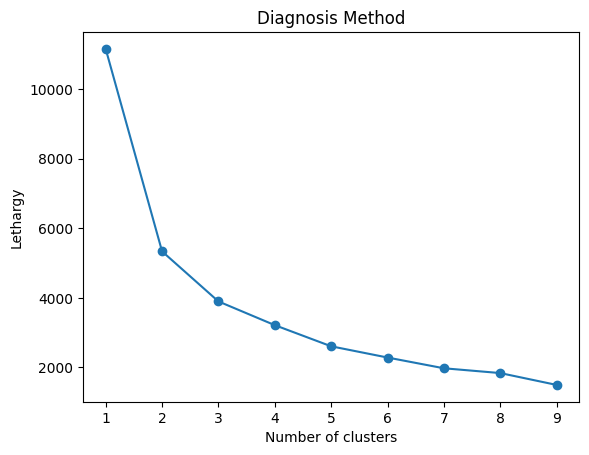

In [24]:
lethargy = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(bc_PCA)
    lethargy.append(kmeans.inertia_)
plt.plot(range(1, 10), lethargy, marker="o")
plt.xlabel("Number of clusters")
plt.ylabel("Lethargy")
plt.title("Diagnosis Method")
plt.show()
n_clusters = 4

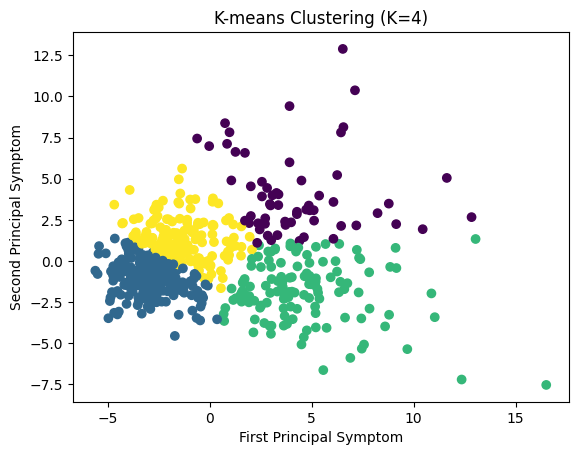

In [25]:
kmeans = KMeans(n_clusters=n_clusters, random_state=42).fit(bc_PCA)
plt.scatter(bc_PCA[:, 0], bc_PCA[:, 1], c=kmeans.labels_, cmap="viridis")
plt.xlabel("First Principal Symptom")
plt.ylabel("Second Principal Symptom")
plt.title(f"K-means Clustering (K={n_clusters})")
plt.show()